## Import dataset 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
plt.style.use('ggplot')
%matplotlib inline

In [3]:
df_all = pd.read_csv('data/april_report.csv')

/home/william/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df_all.columns = [col.lower().replace(' ','_') for col in df_all.columns.tolist()]
df_all.columns = [col.lower().replace('/timestamp','') for col in df_all.columns.tolist()]

In [45]:
date_col = [col for col in df_all.columns.tolist() if 'date' in col]
df_all[date_col] = df_all[date_col].apply(pd.to_datetime,format = "%m/%d/%Y %H:%M:%S")

In [6]:
df_all.event_site_name.unique(),df_all.event_type.unique()

(array(['Nexium24hour', 'Centrum', 'Advil', 'Advil PM', 'Preparationh',
        'Emergenc', 'default'], dtype=object),
 array(['nexium24hour-buy.now', 'centrum-coupon.submit', 'sale.advil',
        'centrum-email.sign.up', 'sale.advilpm', 'sale.centrum',
        'preparationh-coupon.submit', 'preparationh-buy.now', 'sale.nexium',
        'preparationh-email.sign.up', 'advil pm-buy.now', 'advil-buy.now',
        'emergenc-buy.now', 'centrum-buy.now', 'sale.preparationh',
        'emergenc-coupon.submit', 'emergenc-email.sign.up',
        'emergenc-add.to.cart', 'sale.emergenc',
        'emergenc-freesample.submit', 'advil-coupon.submit',
        'advil-email.sign.up', 'nexium24hour-coupon.submit',
        'nexium24hour-email.sign.up', 'advil pm-coupon.submit',
        'advil pm-email.sign.up', 'nexium24hour-sweepstakes.social.share',
        'nexium24hour-sweepstakes.submit', 'emergenc-sale.online'], dtype=object))

In [72]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253306 entries, 0 to 1253305
Data columns (total 23 columns):
unique_row_id           1253306 non-null object
cvo_sid                 1253306 non-null object
event_site_id           1253306 non-null int64
touchpoint_site_id      1253306 non-null int64
event_site_name         1253306 non-null object
touchpoint_site_name    1253306 non-null object
event_type              1253306 non-null object
event_id                1253306 non-null object
event_date              1253306 non-null datetime64[ns]
touchpoint_date         1253306 non-null datetime64[ns]
total_event_value       1253306 non-null float64
touchpoint_revenue      1253306 non-null float64
conversion              1253306 non-null float64
touchpoint_type         1027589 non-null object
first_touch_date        1253306 non-null datetime64[ns]
last_touch_date         1253306 non-null datetime64[ns]
source_1                1253306 non-null object
source_2                1253306 non-nu

## frequency on sales

conversion window 30days

continous window 14 days

max path length 30

event sales

sourse 1 not base


In [55]:
sale_df = df_all[df_all.event_type.str.contains('sale')]

In [78]:
sale_df = sale_df[sale_df.source_1!='base']

sale_df['touch_to_last'] = (sale_df.event_date-sale_df.touchpoint_date).dt.days

df_sale_convwin = sale_df[sale_df.touch_to_last<30]

In [86]:
df_sale_fre = pd.DataFrame({'count':df_sale_convwin.groupby('event_id')['event_id'].count()}).reset_index()

In [98]:
df_sale_fre_count = df_sale_fre.groupby('count')['count'].count().sort_index()[:30]

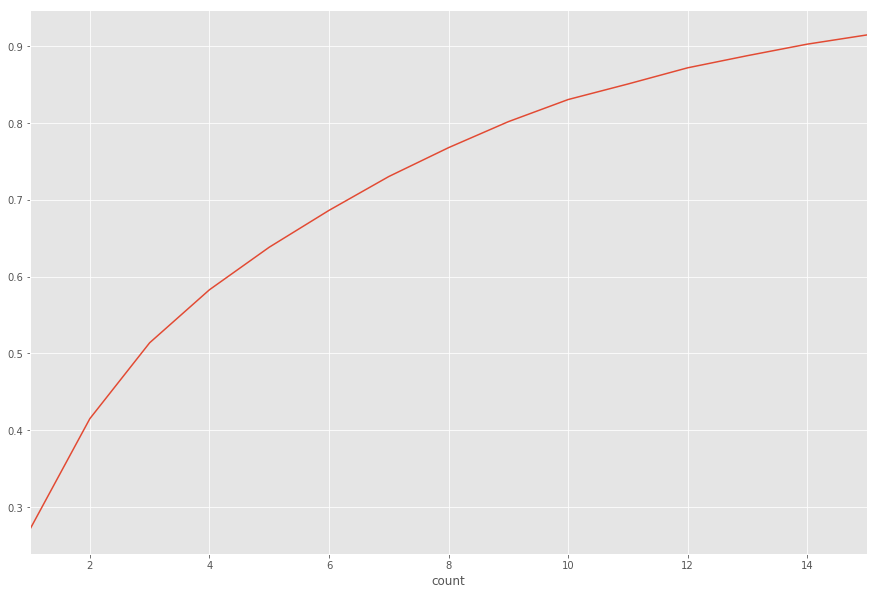

In [106]:
(df_sale_fre_count/df_sale_fre_count.sum()).cumsum()[:15].plot(figsize = (15,10))